#Importing Libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#Uploading File

In [54]:
from google.colab import files
uploaded = files.upload()

Saving diabetes (1).csv to diabetes (1) (1).csv


In [55]:
#Reading File Path
data=pd.read_csv('/content/diabetes (1).csv')

#Details Of Data

In [56]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [58]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#Missing Values Handling

In [59]:
data.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [60]:
data.drop('Pregnancies',axis = 1,inplace = True)

In [61]:
data.duplicated().sum()

0

# * Since there is no string values in data, encoding is not necessary



#Train Test Split

In [62]:
data.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [63]:
x = data.drop('Outcome',axis = 1)
y = data['Outcome']

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

#Scaling


In [65]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

#Logistic Regression

In [66]:
log = LogisticRegression()

In [67]:
log.fit(x_train,y_train)

LogisticRegression()

In [68]:
y_pred = log.predict(x_test)

In [69]:
y_test

,Outcome
668,0
324,0
624,0
690,0
473,0
...,...
355,1
534,0
344,0
296,1


In [70]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [71]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[82, 17],
       [19, 36]])

In [72]:
print('accuracy_score=',accuracy_score(y_test,y_pred))
print('precision_score=',precision_score(y_test,y_pred))
print('recall_score=',recall_score(y_test,y_pred))
print('f1_score=',f1_score(y_test,y_pred))

accuracy_score= 0.7662337662337663
precision_score= 0.6792452830188679
recall_score= 0.6545454545454545
f1_score= 0.6666666666666666


#KNN

In [73]:
values=[]
neighbors =np.arange(3,17)
for i in neighbors:
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  values.append(accuracy_score(y_test,y_pred))

In [74]:
values

[0.6948051948051948,
 0.6948051948051948,
 0.7077922077922078,
 0.7077922077922078,
 0.7337662337662337,
 0.7402597402597403,
 0.7337662337662337,
 0.7532467532467533,
 0.7337662337662337,
 0.7467532467532467,
 0.7532467532467533,
 0.7532467532467533,
 0.7272727272727273,
 0.7402597402597403]

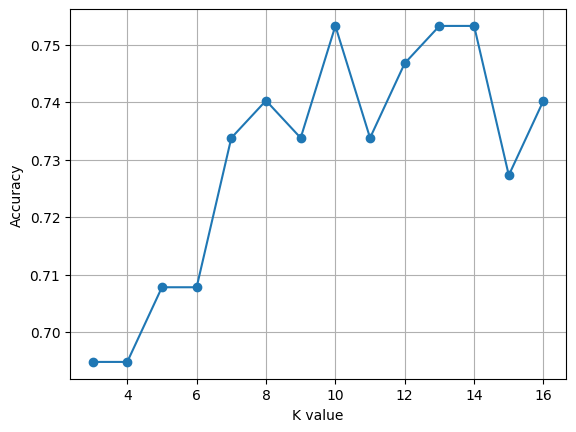

In [75]:
#PLOTTING
plt.plot(neighbors,values,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [76]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [77]:
y_pred_knn = classifier.predict(x_test)
accuracy_score(y_test,y_pred_knn)

0.7077922077922078

In [78]:
values = []
neighbors = np.arange(3,15)

for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  values.append(acc)

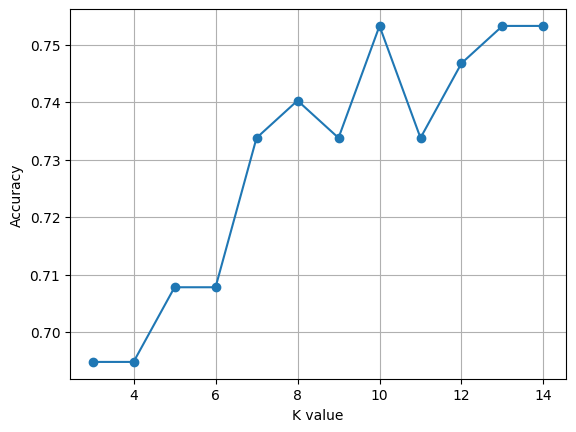

In [79]:
plt.plot(neighbors,values,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [80]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [81]:
y_pred_knn_sc = classifier.predict(x_test)
accuracy_score(y_test,y_pred_knn)

0.7077922077922078

#SVM

In [82]:
sv = SVC()

In [83]:
sv.fit(x_train,y_train)
y_pred_sv = sv.predict(x_test)
accuracy_score(y_test,y_pred_sv)

0.7532467532467533

In [84]:
confusion_matrix(y_test,y_pred_sv)

array([[83, 16],
       [22, 33]])

In [85]:
sv.fit(x_train,y_train)
y_pred_sv_sc = sv.predict(x_test)
accuracy_score(y_test,y_pred_sv_sc)

0.7532467532467533

In [86]:
confusion_matrix(y_pred_sv_sc,y_test)

array([[83, 22],
       [16, 33]])

In [87]:
sv1 = SVC(kernel = "poly",degree=3)
sv1.fit(x_train,y_train)
y_pred_sv1 = sv1.predict(x_test)
accuracy_score(y_test,y_pred_sv1)

0.7402597402597403

#Naive Bayes Classification

In [88]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
accuracy_score(y_test,y_pred_gnb)

0.7597402597402597

#Decision Tree Classification

In [89]:
clf = DecisionTreeClassifier(criterion = 'entropy')

In [90]:
clf.fit(x_train,y_train)
y_pred_dt = clf.predict(x_test)
accuracy_score(y_test,y_pred_dt)

0.6948051948051948

In [91]:
clf1 = DecisionTreeClassifier(criterion = 'entropy')
clf1.fit(x_train,y_train)
y_pred_dt_sc = clf1.predict(x_test)
accuracy_score(y_test,y_pred_dt_sc)

0.6948051948051948

In [92]:
clf.classes_

array([0, 1])